## Деревья решений


Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия характеристик этому правилу.
По результату проверки множество экземляров разбивается на два подмножества (соответствующие правилу, не соответствующие правилу).
Процедура повторяется множество раз.
Последний элемент - лист.

Лист:
 - для классификатора: целевой класс;
 - для регрессора: среднее значение в интервале.
 
Регуляризация дерева:
 - ограничение по максимальной глубине дерева;
 - ограничение на минимальное количество объектов в листе;
 - ограничение на максимальное количество листьев в дереве;
 - требование,улучшения функции качества не менее, чем на n%.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score
%matplotlib inline

In [4]:
# Набор данных - Ирисы Фишера (Андерсона)
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X = iris.data[:, 2:] # petal length and width
target_names = iris.target_names
feature_names = iris.feature_names[2:]

y = iris.target

from sklearn.tree import DecisionTreeClassifier

# criterion: “gini”, “entropy”, “log_loss”. default=”gini”
tree_clf_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=2, random_state=42)
tree_clf_gini.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Критерий Gini

- Оценивает, насколько вероятно, что случайно выбранный элемент будет неправильно классифицирован, если его метку выбирать по распределению в узле.

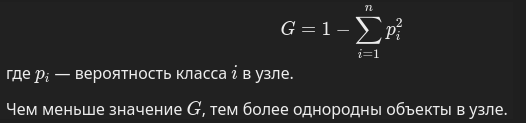

## Критерий entropy

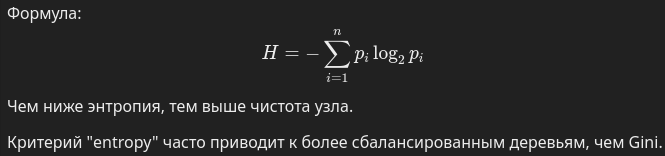

## Критерий логистической потери

- Используется для вероятностного подхода к классификации.

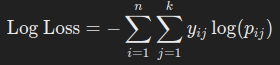



- n — количество объектов,
- k — количество классов,
- yij​ — индикатор того, что объект i принадлежит классу j (принимает значения 0 или 1),
- pij​ — предсказанная вероятность принадлежности объекта i к классу j.


Логистическая потеря в деревьях решений рассчитывается следующим образом:

1) В каждом узле вычисляются вероятности классов (как доли объектов данного класса).
2) Оценивается log_loss по этим вероятностям.
3) Разбиение производится так, чтобы минимизировать log_loss.

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

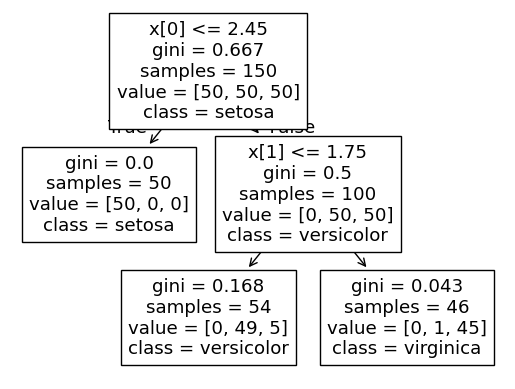

In [6]:
from sklearn import tree
tree.plot_tree(tree_clf_gini, class_names = iris.target_names)
# x[0] - первый признак
# gini = 0.667 показывает высокую неопределённость,

# Дерево решений сперва проверяет длину чашелистика (x[0]), отделяя setosa.
# Затем проверяет ширину чашелистика (x[1]), чтобы разделить versicolor и virginica.
# Чем ниже индекс Джини, тем чище узел. Например, gini = 0.043 означает, что узел почти чистый.

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

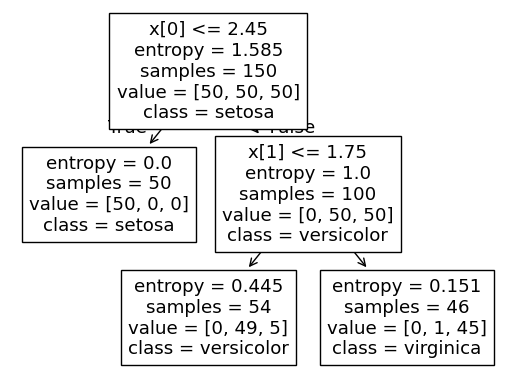

In [7]:
# Task
# criterion: “gini”, “entropy”. default=”gini”

# Задание: постройте и визуализируйте структуру решающего дерева
# для критерия разбиения “entropy"

tree_clf_ent = DecisionTreeClassifier(criterion = 'entropy',max_depth=2, random_state=42)
tree_clf_ent.fit(X, y)

tree.plot_tree(tree_clf_ent, class_names = iris.target_names)


### Анализ дерева

- Разбиение идёт по длине чашелистика (x[0]), как и в дереве с Gini.

- Значение энтропии = 1.585 — это максимально возможное значение для трех классов, что подтверждает, что данные в этом узле распределены равномерно. 

(Энтропия достигает максимального значения, когда все классы равновероятны)

(Энтропия измеряет неопределённость. Если в узле все классы представлены равномерно, значит, неопределённость максимальная — мы не можем заранее сказать, к какому классу принадлежит объект. Если же один класс доминирует, энтропия снижается.)

- В левом листке энтропия 0 - это означает что все 50 образцов принадлежат к лкассу setosa. Энтропия 0 - узел чистый как и в gini.

- Правее 50 образцов versicolor и 50 virginica и энтропия = 1.0 (максимальная для двух классов).

- Деревья получились абсолютно идентичные, но gini должен быстрее вычисляться так как формула проще чем у энтропии.

In [8]:
# обучите серию классификаторов без регуляризации по минимальному количеству экземпляров в листе.
# визуализируйте MAE

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

train = pd.read_csv('./departure-delayed/train_features.csv').fillna(0)
y = pd.read_csv('./departure-delayed/train_target.csv', index_col='id')

# Признак year не несет вариативности в данные 
train.drop('Year', axis=1, inplace=True) 

# Получаем список только числовых признаков, исключая категориальные
real_columns = list(train.dtypes[train.dtypes != 'object'].index.values)
x_train, x_val, y_train, y_val = train_test_split(train[real_columns], y, train_size=0.8, test_size=0.2, random_state=42)

# Обучение дерева с различными значениями min_samples_leaf
min_samples_leaf_values = [1, 2, 3, 4, 5, 8, 10, 20, 30, 50, 100]
mae_train = []
mae_val = []

for min_samples_leaf in min_samples_leaf_values:
    model = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(x_train, y_train)

    mae_train.append(mean_absolute_error(y_train, model.predict(x_train)))
    mae_val.append(mean_absolute_error(y_val, model.predict(x_val)))

KeyboardInterrupt: 

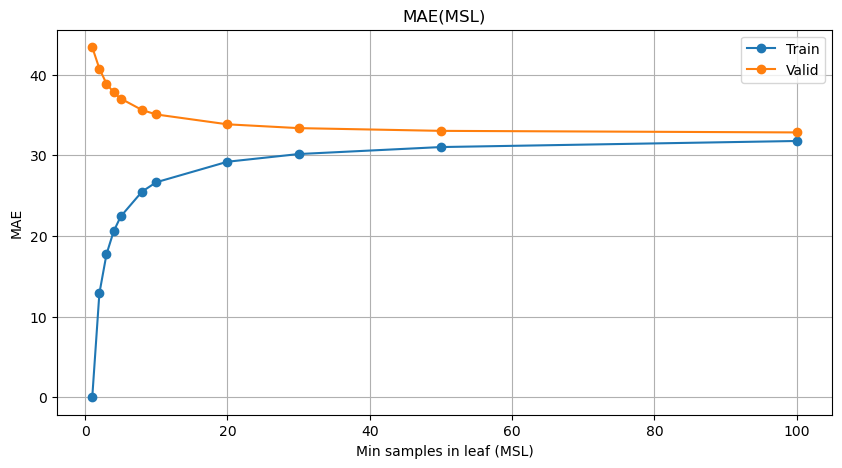

In [27]:
# Визуализация MAE
plt.figure(figsize=(10, 5))
plt.title('MAE(MSL)')
plt.plot(min_samples_leaf_values, mae_train, label='Train', marker='o')
plt.plot(min_samples_leaf_values, mae_val, label='Valid', marker='o')
plt.legend()
plt.xlabel('Min samples in leaf (MSL)')
plt.ylabel('MAE')
plt.grid()
plt.show()

In [33]:
# Обучение дерева с наилучшими параметрами
best_dt = DecisionTreeRegressor(max_depth=21, min_samples_leaf=100)
best_dt.fit(x_train[real_columns], y_train)

mae_best = mean_absolute_error(best_dt.predict(x_val[real_columns]), y_val)
mae_best


32.798148125945886

# Ансамбли

Ансамбли — это методы машинного обучения, в которых несколько моделей объединяются для улучшения предсказательной способности по сравнению с одной моделью. 

В ансамблях используются разные подходы для комбинирования множества слабых моделей (например, деревьев решений) в одну более сильную модель, что обычно приводит к более точным результатам и повышает устойчивость модели к переобучению.

Основные типы ансамблей:

- Bagging 
    - Это метод, при котором обучаются несколько моделей на разных подмножествах данных, и их предсказания усредняются или комбинируются для получения итогового результата.
    - Бэггинг помогает уменьшить дисперсию модели и повышает стабильность.
    - Один из самых известных методов бэггинга — это Random Forest, который использует несколько деревьев решений.
- Boosting
    - В отличие от бэггинга, в бустинге модели обучаются последовательно, и каждая следующая модель пытается исправить ошибки предыдущих.
    - Бустинг может значительно улучшить точность предсказаний
    - Одним из популярных методов бустинга является Gradient Boosting и его разновидности, такие как XGBoost, LightGBM, и CatBoost.
- Stacking
    - Стэкинг представляет собой метод, при котором несколько моделей обучаются параллельно, а их предсказания используются в качестве признаков для другой модели, называемой метамоделью. 
    - Это позволяет комбинировать сильные стороны разных моделей и улучшать точность.



Преимущества ансамблей:

- Снижение переобучения (overfitting), так как комбинация нескольких моделей может уменьшить влияние отдельных ошибок.
- Повышение точности за счет использования разнообразных моделей.
- Устойчивость: ансамбли часто менее чувствительны к шуму и выбросам в данных.

Недостатки:
- Большая вычислительная сложность: обучение нескольких моделей требует больше времени и вычислительных ресурсов.
- Трудность интерпретации: ансамбли сложны для интерпретации, особенно когда используется большое количество моделей.

### OOB Error

- это метод оценки ошибки, используемый в ансамблевых методах

- Этот метод позволяет оценить производительность модели без необходимости в отдельной валидационной выборке или кросс-валидации.

#### Принцип работы Out of Bag Error

- Когда создается ансамбль моделей (например, в случайном лесу), каждая модель обучается на случайной подвыборке данных, которую выбирает метод бэггинга.

- Это подмножество данных называется Bootstrap sample (образец с возвращением). Важно заметить, что не все данные из тренировочного набора попадают в этот подмножество. Для каждого дерева в случайном лесе часть данных будет не использована при обучении — это и есть Out of Bag (OOB) данные.

Вычисление ошибки:

1. Для каждого экземпляра в тренировочном наборе данных, посмотрите, в каких деревьях он не использовался.
2. Примените каждый из этих деревьев к данному экземпляру и получите предсказания для этого экземпляра.
3. Среднее из всех предсказаний этих деревьев (которые не видели данный экземпляр на этапе обучения) используется для вычисления ошибки.
4. Ошибка для каждого экземпляра вычисляется как разница между реальным значением и предсказанием этого экземпляра.


In [34]:
# Задача: выбрать оптимальное количество регрессоров, оптимальные параметры для Bagging Regressor
# Выбрать оптимальные параметры для каждого дерева.

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Одномерный массив
y_train_flat = y_train.values.ravel()

# параметры, которые будут оптимизироваться с помощью GridSearchCV
param_grid = {
    'n_estimators': [4, 6, 8, 10], # количество базовых моделей 
    'max_samples': [0.5, 0.8, 1.0], # доля случайно выбранных данных для каждой из базовых моделей.  
    'max_features': [0.5, 0.8, 1.0] # доля признаков, которые будут использоваться каждым деревом при обучении
}

# Создание модели с правильным параметром
bagging_regressor = BaggingRegressor(estimator=best_dt, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(bagging_regressor, param_grid, scoring='neg_mean_absolute_error', cv=3)
grid_search.fit(x_train[real_columns], y_train_flat)

# Оптимальные параметры
best_params = grid_search.best_params_
best_mae = -grid_search.best_score_

print(f'Лучшие параметры: {best_params}')
print(f'Лучший MAE на валидационной выборке: {best_mae}')

# Лучшие параметры: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10}
# Лучший MAE на валидационной выборке: 32.54331879099552
# 43 минуты

Лучшие параметры: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10}
Лучший MAE на валидационной выборке: 32.54331879099552


## 1. **AdaBoost (Adaptive Boosting)**

обучение на объектах, неверно классифицированных на предыдущем шаге


**Описание**:
AdaBoost — это метод бустинга, который комбинирует слабые модели (например, деревья решений) в ансамбль для улучшения точности предсказаний. Этот метод адаптирует веса для обучающих примеров, чтобы слабые модели могли больше фокусироваться на сложных (ошибочных) примерах.

**Принцип работы**:
- В отличие от других методов, в AdaBoost модели обучаются последовательно, и каждая новая модель фокусируется на ошибках предыдущих.
- Каждому обучающему примеру присваивается вес, и в следующем раунде вес тех примеров, которые были неправильно классифицированы, увеличивается.
- Итоговое предсказание — это взвешенная сумма предсказаний всех моделей.


## 2. **Gradient Boosting**

в направлении

**Описание**:  
Gradient Boosting — это метод ансамблирования, который создает сильную модель путем последовательного обучения слабых моделей, где каждая новая модель исправляет ошибки предыдущей. Основной принцип заключается в минимизации функции потерь с помощью градиентного спуска.

**Принцип работы**:
- Каждая новая модель в ансамбле обучается на остаточных ошибках предыдущих моделей.
- Для исправления ошибок используется градиентный спуск, который оптимизирует функцию потерь.
- Каждая новая модель корректирует ошибки, сделанные предыдущими, и это повторяется в несколько этапов.

**Шаги**:
1. **Инициализация**: Строится первая модель (например, дерево решений).
2. **Итеративное улучшение**: Каждая последующая модель обучается на ошибках предыдущей модели. Модели обучаются с учетом градиента функции потерь.
3. **Комбинирование**: Итоговое предсказание получается путем взвешенного суммирования предсказаний всех моделей.


## 3. **Blending**

**Описание**:  
Blending — это метод ансамблирования, при котором несколько различных моделей обучаются независимо, и их предсказания комбинируются с помощью метамодели. Это подход схож с **стэкингом**, но в отличие от стэкинга, в **blending** метамодель обучается только на предсказаниях базовых моделей, а не на исходных данных.

**Принцип работы**:
1. На первом уровне обучаются несколько моделей (основных моделей), каждая из которых делает свои предсказания.
2. Эти предсказания передаются метамодели, которая обучается на предсказаниях базовых моделей.
3. Метамодель использует предсказания базовых моделей для создания итогового предсказания, комбинируя их с наибольшей точностью.

**Шаги**:
1. **Обучение базовых моделей**: Строятся несколько моделей (например, случайный лес, градиентный бустинг, логистическая регрессия), которые обучаются на обучающих данных.
2. **Предсказания базовых моделей**: Каждая модель делает свои предсказания.
3. **Обучение метамодели**: Полученные предсказания становятся входными данными для метамодели, которая обучается на этих данных.
4. **Финальное предсказание**: Метамодель производит итоговое предсказание на основе предсказаний базовых моделей.

**Преимущества**:
- **Улучшение точности**: Использование нескольких различных моделей может улучшить точность по сравнению с одной моделью, поскольку модели могут покрывать разные аспекты данных.
- **Гибкость**: Можно использовать различные типы моделей, что дает возможность эффективно работать с различными типами данных.
- **Потенциальное улучшение производительности**: Часто дает лучшие результаты, чем использование одной модели.

**Недостатки**:
- **Вычислительная сложность**: Требует больше времени на обучение, так как нужно обучить несколько моделей.
- **Риск переобучения**: Метамодель может переобучиться на предсказаниях базовых моделей, если они слишком сильно зависимы друг от друга.
- **Сложность настройки**: Требует тщательной настройки, чтобы сбалансировать выбор базовых моделей и метамодели.


## 3. **Blending** vs **Stacking**


##### 1. Stacking использует кросс-валидацию для обучения базовых моделей, тогда как Blending использует простое разделение данных на обучающую и тестовую выборки.
##### 2. Stacking более сложен и требует больше вычислительных ресурсов, чем Blending.
##### 3. В Stacking метамодель обучается на предсказаниях базовых моделей, полученных через кросс-валидацию, в Blending — на предсказаниях, полученных на тестовых данных.


# nklt очень капризный в плане кэша и во время одного из запусков он себе что-то побил.
# переделывать весь файл не хочется, так как около часа уйдёт на расчёт.
# поэтому вставлю ниже скрины выполнения в новой среде абсолютно такого же кода

In [ ]:
# Задача. Варьируя параметры ансамбля в подходам блэндинг и стэкинг, обучить оптимальный классификатор.
# Визуализировать графики зависимости предсказания от параметров модели.


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import KFold

import nltk
nltk.data.path.append('/usr/share/nltk_data')

from nltk.corpus import stopwords

print(stopwords.words('english')[:10])  # Проверка


dataset = load_dataset('json', data_files={'train': 'train.jsonl', 'test': 'validation.jsonl'})

nltk.download('stopwords')

vectorizer = CountVectorizer(max_features=500, min_df=4, max_df=0.7, stop_words=stopwords.words('english'))

# Преобразование текстовых данных в матрицу признаков 
X_train_vec = vectorizer.fit_transform(dataset['train']['text'])
vocabulary = vectorizer.get_feature_names_out()
vocabulary

In [ ]:
# Применение TF-IDF трансформации 
tfidf = TfidfTransformer()
X_train_idf = tfidf.fit_transform(X_train_vec)

X_test_vec = vectorizer.transform(dataset['test']['text'])
X_test_idf = tfidf.transform(X_test_vec)

X_train = X_train_idf.toarray()
X_test = X_test_idf.toarray()

# Разделение целевых меток для обучающего и тестового наборов
y_train, y_test = dataset['train']['label'], dataset['test']['label']

X_train_0, X_train_1, y_train_0, y_train_1 = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

n_estimators_range = [5, 10, 20]
max_depth_range = [4, 6, 8]

def make_blending_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

In [ ]:
res = []

# реализуем поиск гиперпараметров для ансамблевых классификаторов, 
# обучая базовые классификаторы RandomForestClassifier с различными значениями n_estimators и max_depth.

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        crf = []  # Список для хранения базовых классификаторов
        y_pred_1 = []  # Список для хранения предсказаний базовых классификаторов

        # Перебор количества базовых классификаторов в ансамбле (от 1 до 10)
        for n in range(1, 11):
            clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=n)
            clf.fit(X_train_0, y_train_0)  # Обучение базового классификатора
            crf.append(clf)  
            y_pred_1.append(clf.predict(X_train_1).reshape(-1, 1))  # Предсказания базового классификатора

        # Транспонируем массив предсказаний базовых классификаторов
        y_pred_1t = np.array(y_pred_1).transpose()[0]

        # Перебор параметров финального классификатора
        for fn in n_estimators_range[-3:]:
            for fd in max_depth_range[-3:]:
                
                # Инициализация и обучение финального классификатора
                clf_final = RandomForestClassifier(n_estimators=fn, max_depth=fd, random_state=42)
                clf_final.fit(y_pred_1t, y_train_1)

                # Оценка финального классификатора на тестовых данных
                y_test_pred = make_blending_prediction(crf, clf_final, X_test)
                acc = metrics.accuracy_score(y_test, y_test_pred)  

                res.append({
                    'base_n_estimators': n_estimators,
                    'base_max_depth': max_depth,
                    'final_n_estimators': fn,
                    'final_max_depth': fd,
                    'accuracy': acc
                })


for max_depth in max_depth_range:
    # Сбор средней точности для каждого количества деревьев при фиксированной максимальной глубине
    subset = [
        np.mean([r['accuracy'] for r in res
                if r['base_max_depth'] == max_depth and r['base_n_estimators'] == n])
        for n in n_estimators_range
    ]
    plt.plot(n_estimators_range, subset, label=f'Max depth = {max_depth}')

plt.xlabel('Numb of trees')
plt.ylabel('Accuracy')
plt.title(f'Accur(numb of trees) Blending')
plt.grid()
plt.legend()
plt.show()

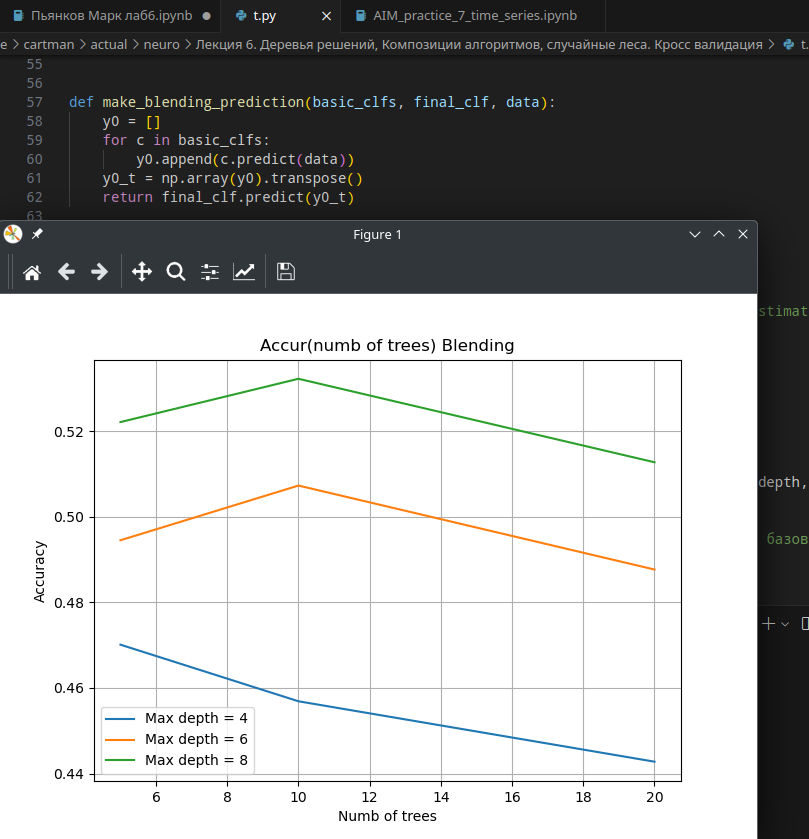

In [ ]:
def make_stacking_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

res = []

# KFold для кросс-валидации
kf = KFold(n_splits=10, random_state=None, shuffle=True)


for base_n_estimators in n_estimators_range:
    for base_max_depth in max_depth_range:

        # Инициализация массива для предсказаний в ходе кросс-валидации
        pre_prediction = np.zeros((len(X_train), kf.get_n_splits()))
        crf_stack = []  # Список для хранения базовых классификаторов

        # CV
        for i, (train_index, test_index) in enumerate(kf.split(X_train)):
            X_train_0, X_test_1 = np.array(X_train)[train_index], np.array(X_train)[test_index]
            y_train_0, y_test_1 = np.array(y_train)[train_index], np.array(y_train)[test_index]

            # Обучение базового классификатора
            clf = RandomForestClassifier(n_estimators=base_n_estimators, max_depth=base_max_depth, random_state=i)
            clf.fit(X_train_0, y_train_0)
            crf_stack.append(clf)
            pre_prediction[test_index, i] = clf.predict(X_test_1) 

        # Перебор параметров финального классификатора
        for final_n in n_estimators_range[-3:]:
            for fd in max_depth_range[-3:]:
                # Инициализация и обучение финального классификатора
                clf_stack_final = RandomForestClassifier(n_estimators=final_n, max_depth=fd, random_state=42)
                clf_stack_final.fit(pre_prediction, y_train)

                # Оценка модели на тестовых данных
                y_test_pred = make_stacking_prediction(crf_stack, clf_stack_final, X_test)
                acc = metrics.accuracy_score(y_test, y_test_pred)  

                res.append({
                    'base_n_estimators': base_n_estimators,
                    'base_max_depth': base_max_depth,
                    'final_n_estimators': final_n,
                    'final_max_depth': fd,
                    'accuracy': acc
                })

for max_depth in max_depth_range:
    # Сбор средней точности для каждого количества деревьев при фиксированной максимальной глубине
    subset = [
        np.mean([r['accuracy'] for r in res
                if r['base_max_depth'] == max_depth and r['base_n_estimators'] == n])
        for n in n_estimators_range
    ]
    plt.plot(n_estimators_range, subset, label=f'Max depth = {max_depth}')

plt.xlabel('Numb of trees')
plt.ylabel('Accuracy')
plt.title(f'Accur(numb of trees) Stackking')
plt.grid()
plt.legend()
plt.show()

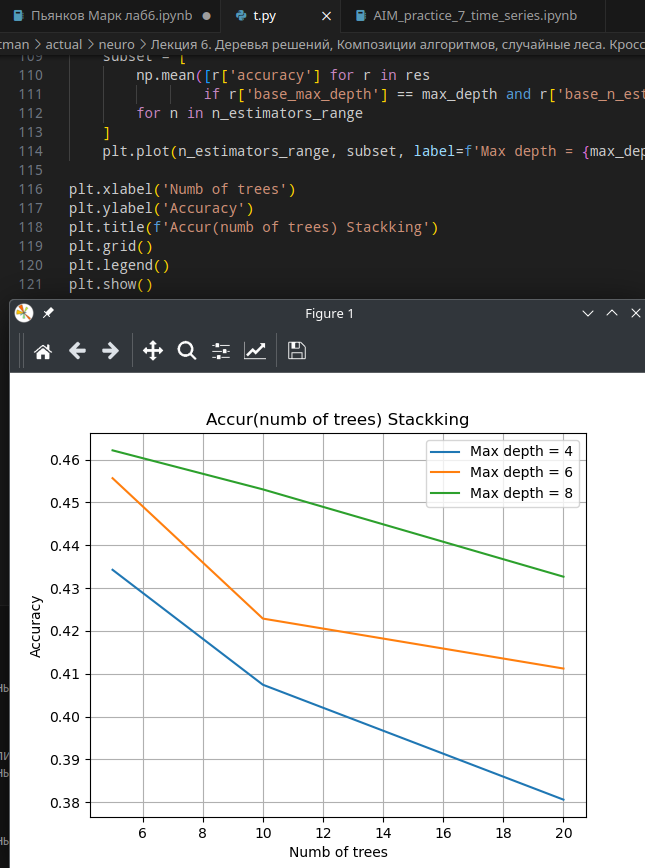